In [249]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# set default settings
IMG_HEIGHT = 30
IMG_WIDTH = 30

EPOCHS = 30
BATCH_SIZE = 32
LEARNING_RATE = 0.001

In [3]:
# get num of classes
num_classes = len(os.listdir("C:/Users/Daniil/Jupyter/SignsData/Train"))
num_classes

205

In [4]:
# make labels for all classes
classes = { 
            0: "Ограничение скорости (20км/ч)",
            1: "Ограничение скорости (30км/ч)", 
            2: "Ограничение скорости (50км/ч)", 
            3: "Ограничение скорости (60км/ч)", 
            4: "Ограничение скорости (70км/ч)", 
            5: "Ограничение скорости (80км/ч)", 
            6: "Конец ограничения скорости (80км/ч)", 
            7: "Ограничение скорости (100км/ч)", 
            8: "Ограничение скорости (120км/ч)", 
            9: "Обгон запрещен", 
            10 :"Обгон грузовым автомобилям запрещен", 
            11 :"Пересечение со второстепенной дорогой", 
            12 :"Главная дорога", 
            13 :"Уступите дорогу", 
            14 :"Стоп", 
            15 :"Движение запрещено", 
            16 :"Движение грузовых автомобилей запрещено", 
            17 :"Въезд запрещен", 
            18 :"Причие опасности", 
            19 :"Опасный поворот налево", 
            20 :"Опасный поворот направо", 
            21 :"Опасные повороты", 
            22 :"Неровная дорога", 
            23 :"Скользкая дорога", 
            24: "Сужение дороги", 
            25: "Дорожные работы", 
            26: "Светофорное регулирование", 
            27: "Пешеходный переход", 
            28: "Дети", 
            29: "Пересечение с велосипедной дорожкой", 
            30: "Впереди снег/лед",
            31: "Дикие животные", 
            32: "Конец всех ограничений", 
            33: "Поворот направо", 
            34: "Поворот налево", 
            35: "Движение только прямо", 
            36: "Прямо или направо", 
            37: "Прямо или налево", 
            38: "Держитесь правее", 
            39: "Держитесь левее", 
            40: "Круговое движение", 
            41: "Конец зоны ограничения обгона", 
            42: "Конец зоны ограничения обгона для грузовых ТС",
            43: "Конец главной дороги",
            44: "Примыкание второстепенной дороги справа",
            45: "Примыкание второстепенной дороги слева",
            46: "Приемущество встречного движения",
            47: "Приемущество перед встречным движением",
            48: "Ж/Д переезд со шлагбаумом",
            49: "Ж/Д переезд без шлагбаума",
            50: "Однопутная железная дорога",
            51: "Многопутная железная дорога",
            52: "Приближение к Ж/Д переезду",
            53: "Пересечение с трамвайной линией",
            54: "Пересечение равнозначных дорог",
            55: "Пересечение с круговым движением",
            56: "Разводной мост",
            57: "Выезд на набережную",
            58: "Крутой спуск",
            59: "Крутой подъем",
            60: "Искусственная неровность",
            61: "Выброс гравия",
            62: "Опасная обочина",
            63: "Двустороннее движение",
            64: "Перегон скота",
            65: "Падение камней",
            66: "Боковой ветер",
            67: "Низколетящие самолеты",
            68: "Тоннель",
            69: "Затор",
            70: "Направление поворота (лево)",
            71: "Направление поворота (право)",
            72: "Движение м/ТС запрещено",
            73: "Движение мотоциклов запрещено",
            74: "Движение тракторов запрещено",
            75: "Движение с прицепом запрещено",
            76: "Движение гужевых повозок запрещено",
            77: "Движение на велосипедах запрещено",
            78: "Движение пешеходов запрещено",
            79: "Ограничение массы",
            80: "Ограничение массы на ось ТС",
            81: "Ограничение высоты",
            82: "Ограничение ширины",
            83: "Ограничение длины",
            84: "Ограничение минимальной дистанции",
            85: "Таможня",
            86: "Опасность",
            87: "Контроль",
            88: "Поворот направо запрещен",
            89: "Поворот налево запрещен",
            90: "Разворот запрещен",
            91: "Подача звукового сигнала запрещена",
            92: "Остановка запрещена",
            93: "Стоянка запрещена",
            94: "Стоянка запрещена по нечетным числам",
            95: "Стоянка запрещена по четным числам",
            96: "Движение с опасными грузами запрещено",
            97: "Движение с взрывчатыми грузами запрещено",
            98: "Движение направо или налево",
            99: "Объезд препятствия справа или слева",
            100: "Велосипедная дорожка",
            101: "Конец велосипедной дорожки",
            102: "Пешеходная дорожка",
            103: "Пешеходно-велосипедная дорожка",
            104: "Конец пешеходно-велосипедной дорожки",
            105: "Пешеходная и велосипедная дорожка с разделением",
            106: "Конец пешеходной и велосипедной дорожки с разделением",
            107: "Ограничение минимальной скорости",
            108: "Конец зоны ограничения минимальной скорости",
            109: "Направление движения ТС с опасными грузами",
            110: "Автомагистраль",
            111: "Конец автомагистрали",
            112: "Дорога для автомобилей",
            113: "Конец дороги для автомобилей",
            114: "Дорога с односторонним движением",
            115: "Конец дороги с односторонним движением",
            116: "Выезд на дорогу с односторонним движением",
            117: "Реверсивное движение",
            118: "Конец реверсивного движения",
            119: "Выезд на дорогу с реверсивным движением",
            120: "Дорога с полосой для маршрутных ТС",
            121: "Дорога с полосой для велосипедистов",
            122: "Конец дороги с полосой для маршрутных ТС",
            123: "Конец дороги с полосой для велосипедистов",
            124: "Выезд на дорогу с полосой для маршрутных ТС",
            125: "Выезд на дорогу с полосой для велосипедистов",
            126: "Полоса для маршрутных ТС",
            127: "Конец полосы для маршрутных ТС",
            128: "Полоса для велосипедистов",
            129: "Конец полосы для велосипедистов",
            130: "Направления движения по полосе",
            131: "Конец полосы",
            132: "Число полос",
            133: "Место остановки автобуса",
            134: "Место остановки трамвая",
            135: "Место стоянки легковых такси",
            136: "Жилая зона",
            137: "Конец жилой зоны",
            138: "Начало населеного пункта",
            139: "Конец населеного пункта",
            140: "Зона с ограничением стоянки",
            141: "Конец зоны с ограничением стоянки",
            142: "Зона регулируемой стоянки",
            143: "Конец зоны регулируемой стоянки",
            144: "Зона с ограничением максимальной скорости",
            145: "Конец зоны с ограничением максимальной скорости",
            146: "Пешеходная зона",
            147: "Конец пешеходной зоны",
            148: "Общие ограничения максимальной скорости",
            149: "Рекомендуемая скорость",
            150: "Место для разворота",
            151: "Зона для разворота",
            152: "Парковка",
            153: "Полоса аварийной остановки",
            154: "Подземный пешеходный переход",
            155: "Надземный переходный переход",
            156: "Тупик",
            157: "Предварительный указатель направлений",
            158: "Схема движения",
            159: "Указатель направлений",
            160: "Указатель расстояний",
            161: "Километровый знак",
            162: "Номер маршрута",
            163: "Напревление движения для грузовых автомобилей",
            164: "Стоп линия",
            165: "Пункт медицинской помощи",
            166: "Больница",
            167: "АЗС",
            168: "Техническое обслуживание автомобилей",
            169: "Мойка автомобилей",
            170: "Телефон",
            171: "Пункт питания",
            172: "Питьевая вода",
            173: "Гостиница",
            174: "Кемпинг",
            175: "Место отдыха",
            176: "Пост ДПС",
            177: "Полиция",
            178: "Пункт транспортного контроля",
            179: "Пляж",
            180: "Туалет",
            181: "Телефон экстренной связи",
            182: "Огнетушитель",
            183: "Расстояние до объекта",
            184: "Зона действия",
            185: "Вид ТС",
            186: "Кроме вида ТС",
            187: "Субботние, воскресные и праздничные дни",
            188: "Рабочие дни",
            189: "Время действия",
            190: "Способ постановки ТС на стоянку",
            191: "Стоянка с неработающим двигателем",
            192: "Платные услуги",
            193: "Ограничение продолжительности стоянки",
            194: "Место для осмотра автомобилей",
            195: "Ограничение максимально разрешенной массы",
            196: "Опасная обочина",
            197: "Направление главной дороги",
            198: "Полоса движения",
            199: "Слепые пешеходы",
            200: "Влажное покрытие",
            201: "Инвалиды",
            202: "Кроме инвалидов",
            203: "Фотовидеофиксация",
            204: "Работает эвакуатор"
          }

In [5]:
# store images info and class labels to array
img_info = []
img_class = []

# loop through all folders to get images
for folder in tqdm(range(num_classes)):
    path = "C:/Users/Daniil/Jupyter/SignsData/Train/" + str(folder)
    images = os.listdir(path)
    
    # collect and resize every single image
    for img in images:
        try:
            # for easier manipulating PIL.Image is used
            image = cv2.imread(path + "/" + img)
            image = Image.fromarray(image, "RGB")
            image = image.resize((IMG_HEIGHT, IMG_WIDTH))
            img_info.append(np.array(image))
            img_class.append(folder)
        except:
            print("Error occured in:", img)

# convert to array
img_info = np.array(img_info)
img_class = np.array(img_class)

  0%|          | 0/205 [00:00<?, ?it/s]

In [254]:
# 97889 images 30x30 RGB
print(img_info.shape, img_class.shape)

(97889, 30, 30, 3) (97889,)


In [7]:
# shuffle all training images (classes should be shuffled the same way)
index_shuffler = np.arange(img_info.shape[0])
np.random.shuffle(index_shuffler)

img_info = img_info[index_shuffler]
img_class = img_class[index_shuffler]

In [8]:
# shuffle again just to be pretty sure
X_train, X_val, y_train, y_val = train_test_split(img_info, img_class, test_size=0.25, random_state=42, shuffle=True)

# normalize data to have all images from 0 to 1
X_train = X_train / 255
X_val = X_val / 255

In [9]:
# encode class labels
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [10]:
model = Sequential([
    # start block 
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    
    # middle block 
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"), 
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),
    
    # final block
    Flatten(),
    Dense(512, activation="relu"), 
    BatchNormalization(),
    Dropout(rate=0.5),
    
    # output
    Dense(205, activation="softmax")
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, decay=LEARNING_RATE * 1/2),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
# data augmentation online
augmentator = ImageDataGenerator(rotation_range=10, 
                                 zoom_range=0.15,
                                 height_shift_range=0.1,
                                 width_shift_range=0.1,
                                 shear_range=0.15)

In [13]:
history = model.fit(augmentator.flow(X_train, y_train, batch_size=BATCH_SIZE), epochs=EPOCHS, validation_data=(X_val, y_val))

Epoch 1/30
2295/2295 [==============================] - 81s 35ms/step - loss: 1.5406 - accuracy: 0.6199 - val_loss: 0.2442 - val_accuracy: 0.9336
Epoch 2/30
2295/2295 [==============================] - 77s 34ms/step - loss: 0.4685 - accuracy: 0.8665 - val_loss: 0.1179 - val_accuracy: 0.9660
Epoch 3/30
2295/2295 [==============================] - 79s 34ms/step - loss: 0.2942 - accuracy: 0.9150 - val_loss: 0.0748 - val_accuracy: 0.9783
Epoch 4/30
2295/2295 [==============================] - 80s 35ms/step - loss: 0.2281 - accuracy: 0.9336 - val_loss: 0.0538 - val_accuracy: 0.9851
Epoch 5/30
2295/2295 [==============================] - 80s 35ms/step - loss: 0.1817 - accuracy: 0.9471 - val_loss: 0.0463 - val_accuracy: 0.9858
Epoch 6/30
2295/2295 [==============================] - 80s 35ms/step - loss: 0.1556 - accuracy: 0.9536 - val_loss: 0.0398 - val_accuracy: 0.9882
Epoch 7/30
2295/2295 [==============================] - 79s 34ms/step - loss: 0.1352 - accuracy: 0.9608 - val_loss: 0.0337 -

<AxesSubplot:>

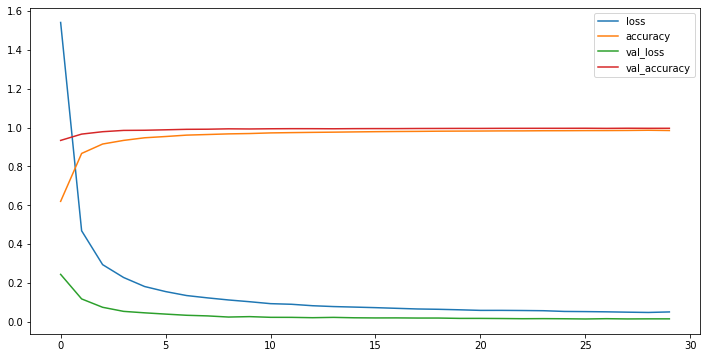

In [280]:
pd.DataFrame(history.history).plot(figsize=(12, 6))

## Check accuracy and classification report

In [242]:
test = pd.read_csv("C:/Users/Daniil/Jupyter/SignsData/Test_data.csv")
labels = test["ClassId"].values
labels = labels.astype("int64")
imgs = test["Path"].values

data = []
data_dir = "C:/Users/Daniil/Jupyter/SignsData"

for img in imgs:
    try:
        image = cv2.imread(data_dir + "/" + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

In [243]:
X_test = np.array(data)
X_test = X_test/255

In [244]:
pred = np.argmax(model.predict(X_test),axis=-1)

print("Accuracy on test images:", accuracy_score(labels, pred))

Accuracy on test images: 0.960227485314476


In [272]:
report = pd.DataFrame(classification_report(labels, pred, output_dict=True)).T
report

,precision,recall,f1-score,support
0,0.935484,0.966667,0.950820,60.000000
1,0.980900,0.998611,0.989677,720.000000
2,0.976471,0.996000,0.986139,750.000000
3,0.993088,0.957778,0.975113,450.000000
4,0.998452,0.977273,0.987749,660.000000
...,...,...,...,...
203,0.968504,0.976190,0.972332,252.000000
204,0.911877,0.944444,0.927875,252.000000
accuracy,0.960227,0.960227,0.960227,0.960227
macro avg,0.958841,0.956008,0.956038,53454.000000


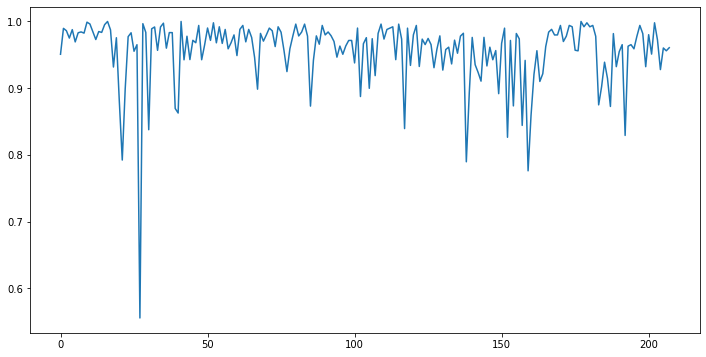

In [276]:
report["f1-score"].plot(figsize=(12, 6));